In [1]:
! pip install dionysus

     |████████████████████████████████| 1.7MB 13.3MB/s 
  Created wheel for dionysus: filename=dionysus-2.0.8-cp36-cp36m-linux_x86_64.whl size=322799 sha256=c1435e10f1a0fd20672f6007a35c2f474ad8aa1b531e1880e8794db30675617e
  Stored in directory: /root/.cache/pip/wheels/91/a9/4e/dcf72861c267c8445765197025f7a02f887fc8f6b43c9c710c
Successfully built dionysus


In [2]:
import dionysus as ds
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from skimage.morphology import skeletonize
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [3]:
mnist = keras.datasets.mnist
(train, digit_train), (test, digit_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
data_X = np.concatenate((train,test))
data_y = np.concatenate((digit_train,digit_test))

In [5]:
class graph:

  def __init__(self, vertices = [] , edges = [], visited = [], bfs = []):
    self.v = vertices
    self.e = edges
    self.visit = visited
    self.bfs = bfs

  def set_visits(self):
    self.visit = []
    self.bfs = []
    for i in range(len(self.v)):
        self.visit.append(0)
        self.bfs.append(0)

  def adjacency(self):
    for i in range(len(self.v)):
      print("Vertex ", self.v[i] ," is connected to:")
      print(self.e[i])
  
  def add_vertex(self, v):
    self.v.append(v)
    self.e.append([])
    self.visit.append(0)
  
  def set_edges(self):
    for i in range(len(self.v)):
      self.e.append([])

  def add_edge(self, e):
    e1 = e[0]
    e2 = e[1]
    for i in range(len(self.v)):
      if self.v[i] == e2:
        self.e[i].append(e1)
    for i in range(len(self.v)):
      if self.v[i] == e1:
        self.e[i].append(e2)

  def if_edge(self, e):
    e1 = e[0]
    e2 = e[1]
    k = -1
    for i in range(len(self.v)):
      if self.v[i] == e1:
        break
    return e2 in self.e[i]

  def get_index(self , v):
    for i in range(len(self.v)):
      if self.v[i] == v:
        break
    return i
  
  def get_row(self , v):
    for i in range(len(self.v)):
      if self.v[i] == v:
        break
    row = []
    for j in range(len(self.v)):
      edge = self.v[j] in self.e[i]
      row.append(edge*1)
    return row

  def adjacency_matrix(self):
    adjacency_matrix = []
    for i in range(len(self.v)):
      adjacency_matrix.append(self.get_row(self.v[i]))
    return adjacency_matrix
  
  def update_visit(self , w):
    i = self.get_index(w)
    self.visit[i] = 1
  
  def get_visit(self,w):
    i = self.get_index(w)
    return self.visit[i]
  
  def update_bfs(self, w, t):
    i = self.get_index(w)
    self.bfs[i] = t

  def visit_left(self):
    return 0 in self.visit

  def bfs_val(self):
    return(max(self.bfs))

In [6]:
def get_edges(graph, ord = False, v = 0):
  get_edges = []
  if ord == False:
    vertices = graph.v
    edges = graph.e
    for i in range(len(vertices)):
      vertex = vertices[i]
      while edges[i] != []:
        get_edges.append([vertex, edges[i][0]])
        edges[graph.get_index(edges[i][0])].remove(vertex)
        edges[i].pop(0)
    return get_edges
  if ord:
    vertices = graph.v
    order = graph.bfs_order(v)
    order_edge = []
    edges = graph.e
    for i in range(len(vertices)):
      vertex = vertices[i]
      while edges[i] != []:
        get_edges.append([vertex, edges[i][0]])
        order
        edges[graph.get_index(edges[i][0])].remove(vertex)
        edges[i].pop(0)
    return (get_edges,order_edge)


In [7]:
def get_graph(vertices , edges):
  sample = graph(vertices)
  sample.set_edges()
  for i in edges:
    sample.add_edge(i)
  return sample

In [8]:
def bfs_order(graph, v):
  time = 1
  graph.set_visits()
  graph.update_bfs(v, time)
  graph.update_visit(v)
  temp = graph.e[graph.get_index(v)]
  while graph.visit_left():
    time = time + 1
    temp2 = []
    for t in temp:
      if graph.get_visit(t) == 0:
        graph.update_bfs(t,time)
        graph.update_visit(t)
        temp2 = temp2 + graph.e[graph.get_index(t)]
    if temp == []:
      temp2 = (graph.visit).index(0)
    temp = temp2

In [9]:
def bfs_simplex_0(graph, v):
  s_0 = []
  graph.set_visits()
  bfs_order(graph, v)
  for i in graph.v:
    s_0.append(([i], graph.bfs[graph.get_index(i)]))
  return s_0   

In [33]:
def bfs_simplex_1(graph, v):
  s_1 = []
  graph.set_visits()
  bfs_order(graph, v)
  for i in get_edges(graph):
    t = max(graph.bfs[graph.get_index(i[0])],graph.bfs[graph.get_index(i[1])])
    s_1.append((i,t))
  return s_1

In [34]:
#testing functions
sample = graph([1,2,3],[[2,3],[1],[1]])
sample.adjacency()
sample.add_vertex(4)
sample.adjacency()
sample.add_edge([3,4])
sample.adjacency()
sample.set_visits()
sample.visit
sample.if_edge([4,2])
sample.get_row(1)
sample.adjacency_matrix()

Vertex  1  is connected to:
[2, 3]
Vertex  2  is connected to:
[1]
Vertex  3  is connected to:
[1]
Vertex  1  is connected to:
[2, 3]
Vertex  2  is connected to:
[1]
Vertex  3  is connected to:
[1]
Vertex  4  is connected to:
[]
Vertex  1  is connected to:
[2, 3]
Vertex  2  is connected to:
[1]
Vertex  3  is connected to:
[1, 4]
Vertex  4  is connected to:
[3]


[[0, 1, 1, 0], [1, 0, 0, 0], [1, 0, 0, 1], [0, 0, 1, 0]]

In [35]:
def get_skeleton(image):
    binary_image = image.astype(bool)
    skeleton = skeletonize(binary_image)
    skeleton = skeleton.astype(int)
    return skeleton

In [36]:
def points(vertices):
  point = []
  [v0,v1] = vertices
  for i in range(np.shape(v0)[0]):
    point.append([v0[i],v1[i]])
  return list(point)

In [37]:
def skeleton_points(image):
  sk = get_skeleton(image)
  vert_1 = np.where(sk== 1)
  return points(vert_1)

In [38]:
def get_up_nghbrs(vertex, allpt):
  [x,y] = allpt[vertex]
  neighbours = [[x,y+1], [x+1,y], [x+1,y+1], [x+1, y-1]]
  ngbhr_vertices = []
  for i in neighbours:
    if i in allpt:
      ngbhr_vertices.append([vertex,allpt.index(i)])
  return ngbhr_vertices

In [39]:
def get_up_nghbrs_nd(vertex, allpt):
  [x,y] = allpt[vertex]
  neighbours = [[x,y+1], [x+1,y]]
  ngbhr_vertices = []
  for i in neighbours:
    if i in allpt:
      ngbhr_vertices.append([vertex,allpt.index(i)])
  return ngbhr_vertices

In [40]:
def graph_sk_edge(allpt):
  v = np.arange(np.shape(allpt)[0])
  e = []
  for i in v:
    e = e + get_up_nghbrs(i,allpt)
  return e

In [41]:
def graph_sk_edge_r3c(allpt):
  v = np.arange(np.shape(allpt)[0])
  e = []
  for i in v:
    e = e + get_up_nghbrs_nd(i,allpt)
  return e

In [42]:
def skeletongraph(image, show = -1):
  allpt = skeleton_points(image)
  v = np.arange(np.shape(allpt)[0])
  e = graph_sk_edge(allpt)
  if show == -1:
    g = graph(v,[])
    g.set_edges()
    for i in e:
      g.add_edge(i)
    return g
  if show == 1:
    g = nx.Graph()
    g.add_nodes_from(v)
    g.add_edges_from(e)
    return g

In [43]:
def add_edges_diag_r3c(g, allpt):
  for i in g.v:
    [x,y] = allpt[i]
    neighbours = [[x+1,y+1], [x+1, y-1]]
    for j in neighbours:
      if j in allpt:
        k = allpt.index(j)
        edges_k = g.e[k]
        edges_i = g.e[i]
        intersection = list(set(edges_k) & set(edges_i))
        if intersection == []:
          g.add_edge([i,k])
  return g

In [44]:
def skeletongraphr3c(image, show = -1):
  allpt = skeleton_points(image)
  v = np.arange(np.shape(allpt)[0])
  e = graph_sk_edge_r3c(allpt)
  g = graph(v,[])
  g.set_edges()
  for i in e:
    g.add_edge(i)
  g_n = add_edges_diag_r3c(g,allpt)
  if show == -1:
    return g_n
  if show == 1:
    g_r = nx.Graph()
    g_r.add_nodes_from(v)
    g_r.add_edges_from(get_edges(g_n))
    return g_r

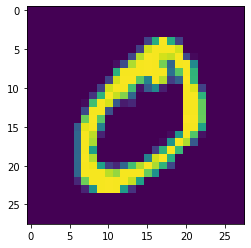

In [45]:
image = data_X[1]
plt.imshow(image)
g_0 = skeletongraph(image, 1)
g_1 = skeletongraph(image , -1)
g_3 = skeletongraphr3c(image, 1)
g_4 = skeletongraphr3c(image, -1)

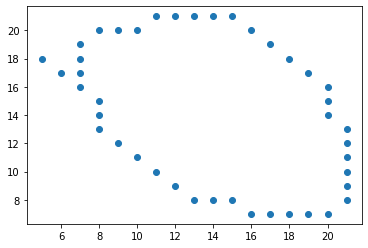

In [46]:
#Skeletonising
sk = get_skeleton(image)
vo,v1 = np.where(sk== 1)
plt.scatter(vo,v1)

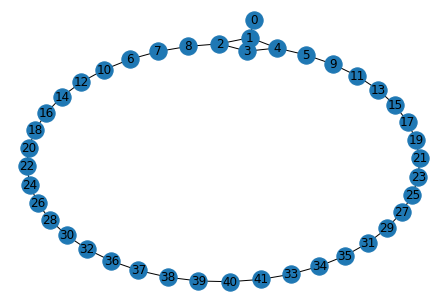

In [47]:
#Shows graph with labelling of vertices
nx.draw_kamada_kawai(g_0, with_labels=True)

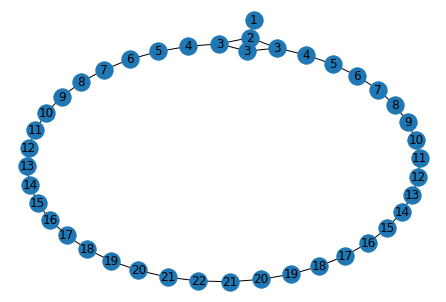

In [48]:
#Shows graph with bfs stream labelling of vertices without excluding cycles of length 3
bfs_simplex_0(g_1,0)
labels={i:g_1.bfs[i] for i in range(0, np.shape(g_1.bfs)[0])}
nx.draw_kamada_kawai(g_0,labels = labels, with_labels=True)

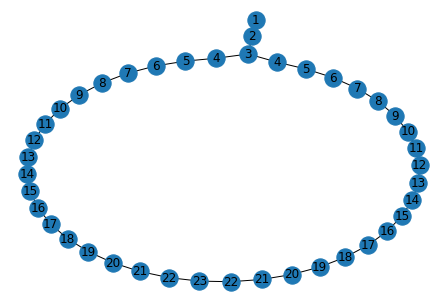

In [49]:
#Shows graph with bfs stream labelling of vertices excluding cycles of length 3
bfs_simplex_0(g_4,0)
labels={i:g_4.bfs[i] for i in range(0, np.shape(g_4.bfs)[0])}
nx.draw_kamada_kawai(g_3,labels = labels, with_labels=True)

In [55]:
sim_0 = bfs_simplex_0(skeletongraphr3c(image, -1),0)
sim_1 = bfs_simplex_1(skeletongraphr3c(image, -1),0)
sim = sim_0 + sim_1
print(sim)

[([0], 1), ([1], 2), ([2], 4), ([3], 3), ([4], 4), ([5], 5), ([6], 7), ([7], 6), ([8], 5), ([9], 6), ([10], 8), ([11], 7), ([12], 9), ([13], 8), ([14], 10), ([15], 9), ([16], 11), ([17], 10), ([18], 12), ([19], 11), ([20], 13), ([21], 12), ([22], 14), ([23], 13), ([24], 15), ([25], 14), ([26], 16), ([27], 15), ([28], 17), ([29], 16), ([30], 18), ([31], 17), ([32], 19), ([33], 20), ([34], 19), ([35], 18), ([36], 20), ([37], 21), ([38], 22), ([39], 23), ([40], 22), ([41], 21), ([0, 1], 2), ([1, 3], 3), ([2, 3], 4), ([2, 8], 5), ([3, 4], 4), ([4, 5], 5), ([5, 9], 6), ([6, 7], 7), ([6, 10], 8), ([7, 8], 6), ([9, 11], 7), ([10, 12], 9), ([11, 13], 8), ([12, 14], 10), ([13, 15], 9), ([14, 16], 11), ([15, 17], 10), ([16, 18], 12), ([17, 19], 11), ([18, 20], 13), ([19, 21], 12), ([20, 22], 14), ([21, 23], 13), ([22, 24], 15), ([23, 25], 14), ([24, 26], 16), ([25, 27], 15), ([26, 28], 17), ([27, 29], 16), ([28, 30], 18), ([29, 31], 17), ([30, 32], 19), ([31, 35], 18), ([32, 36], 20), ([33, 34],

In [56]:
f = ds.Filtration()
for vertices, time in sim:
  f.append(ds.Simplex(vertices, time))

In [57]:
f.sort()
m = ds.homology_persistence(f)

In [58]:
#Prints Persistence Diagram
diagrams = ds.init_diagrams(m,f)
print(diagrams)
for i,dgms in enumerate(diagrams):
  for pt in dgms:
    print(i , pt.birth, pt.death)

[Diagram with 1 points, Diagram with 1 points]
0 1.0 inf
1 23.0 inf


In [59]:
#Prints simplex stream
for s in f:
  print(s)

<0> 1
<1> 2
<0,1> 2
<3> 3
<1,3> 3
<2> 4
<4> 4
<2,3> 4
<3,4> 4
<5> 5
<8> 5
<2,8> 5
<4,5> 5
<7> 6
<9> 6
<5,9> 6
<7,8> 6
<6> 7
<11> 7
<6,7> 7
<9,11> 7
<10> 8
<13> 8
<6,10> 8
<11,13> 8
<12> 9
<15> 9
<10,12> 9
<13,15> 9
<14> 10
<17> 10
<12,14> 10
<15,17> 10
<16> 11
<19> 11
<14,16> 11
<17,19> 11
<18> 12
<21> 12
<16,18> 12
<19,21> 12
<20> 13
<23> 13
<18,20> 13
<21,23> 13
<22> 14
<25> 14
<20,22> 14
<23,25> 14
<24> 15
<27> 15
<22,24> 15
<25,27> 15
<26> 16
<29> 16
<24,26> 16
<27,29> 16
<28> 17
<31> 17
<26,28> 17
<29,31> 17
<30> 18
<35> 18
<28,30> 18
<31,35> 18
<32> 19
<34> 19
<30,32> 19
<34,35> 19
<33> 20
<36> 20
<32,36> 20
<33,34> 20
<37> 21
<41> 21
<33,41> 21
<36,37> 21
<38> 22
<40> 22
<37,38> 22
<40,41> 22
<39> 23
<38,39> 23
<39,40> 23
